# Testing LSST pipeline

Jim Bosch has an example here: https://www.astro.princeton.edu/~jbosch/hsc/HSC-Pipeline-Outputs.html

Here we will attempot to reproduce the example at https://pipelines.lsst.io/v/DM-11391/getting-started I now think this example was built for the 14.0.0 stack and will not work now.

The examples we are running here are from https://pipelines.lsst.io/getting-started

Here are the full command line commands needed to run the visualisation.

```Shell
cd
```

In [1]:
import lsst.daf.persistence as dafPersist
butler = dafPersist.Butler(inputs='DATA/rerun/processCcdOutputs')


In [2]:
butler.queryMetadata('calexp', ['visit', 'ccd'], dataId={'filter': 'HSC-R'})

[(903334, 16),
 (903334, 22),
 (903334, 23),
 (903334, 100),
 (903336, 17),
 (903336, 24),
 (903338, 18),
 (903338, 25),
 (903342, 4),
 (903342, 10),
 (903342, 100),
 (903344, 0),
 (903344, 5),
 (903344, 11),
 (903346, 1),
 (903346, 6),
 (903346, 12)]

In [3]:
calexp = butler.get('calexp', dataId={'filter': 'HSC-R', 'visit': 903334, 'ccd': 23})

In [4]:
import lsst.afw.display as afwDisplay

In [5]:
#DS9 must be open to run this
display = afwDisplay.getDisplay()

In [7]:
display.mtv(calexp)

In [8]:
display.setMaskTransparency(60)

In [9]:
display.scale("asinh", "zscale")

In [10]:
display.scale("asinh", -1, 30)

In [12]:
mask = calexp.getMask()
for maskName, maskBit in mask.getMaskPlaneDict().items():
    print('{}: {}'.format(maskName, display.getMaskPlaneColor(maskName)))

BAD: red
CR: magenta
CROSSTALK: None
DETECTED: blue
DETECTED_NEGATIVE: cyan
EDGE: yellow
INTRP: green
NOT_DEBLENDED: None
NO_DATA: orange
SAT: green
SUSPECT: yellow
UNMASKEDNAN: None


In [13]:
src = butler.get('src', dataId={'filter': 'HSC-R', 'visit': 903334, 'ccd': 23})

In [14]:
print(len(src))

1256


In [16]:
print(src.getSchema())

Schema(
    (Field['L'](name="id", doc="unique ID"), Key<L>(offset=0, nElements=1)),
    (Field['Angle'](name="coord_ra", doc="position in ra/dec"), Key<Angle>(offset=8, nElements=1)),
    (Field['Angle'](name="coord_dec", doc="position in ra/dec"), Key<Angle>(offset=16, nElements=1)),
    (Field['L'](name="parent", doc="unique ID of parent source"), Key<L>(offset=24, nElements=1)),
    (Field['Flag'](name="calib_detected", doc="Source was detected as an icSource"), Key['Flag'](offset=32, bit=0)),
    (Field['Flag'](name="calib_psf_candidate", doc="Flag set if the source was a candidate for PSF determination, as determined by the star selector."), Key['Flag'](offset=32, bit=1)),
    (Field['Flag'](name="calib_psf_used", doc="Flag set if the source was actually used for PSF determination, as determined by the"), Key['Flag'](offset=32, bit=2)),
    (Field['Flag'](name="calib_psf_reserved", doc="set if source was reserved from PSF determination"), Key['Flag'](offset=32, bit=3)),
    (Fiel

In [17]:
print(src.getSchema().getNames())

{'base_CircularApertureFlux_25_0_instFlux', 'base_Blendedness_old', 'base_LocalPhotoCalibErr', 'base_PixelFlags_flag_saturated', 'base_CircularApertureFlux_4_5_instFlux', 'base_SdssShape_yy', 'base_SdssShape_xy', 'deblend_psfCenter_x', 'coord_dec', 'base_PsfFlux_flag_noGoodPixels', 'base_CircularApertureFlux_6_0_flag_sincCoeffsTruncated', 'coord_ra', 'base_Blendedness_raw_parent_xy', 'deblend_psf_instFlux', 'base_Blendedness_abs_parent_yy', 'ext_photometryKron_KronFlux_flag_no_minimum_radius', 'ext_photometryKron_KronFlux_flag_bad_shape', 'base_CircularApertureFlux_70_0_flag', 'ext_shapeHSM_HsmSourceMoments_flag_no_pixels', 'ext_photometryKron_KronFlux_psf_radius', 'base_CircularApertureFlux_9_0_flag_apertureTruncated', 'base_LocalBackground_flag_noGoodPixels', 'base_PixelFlags_flag_suspect', 'base_PixelFlags_flag', 'base_LocalBackground_flag_noPsf', 'base_CircularApertureFlux_3_0_instFluxErr', 'calib_photometry_reserved', 'base_PixelFlags_flag_bad', 'ext_photometryKron_KronFlux_flag_u

In [18]:
print(src.schema.find("calib_psf_used"))

(Key['Flag'](offset=32, bit=2), Field['Flag'](name="calib_psf_used", doc="Flag set if the source was actually used for PSF determination, as determined by the"))


In [19]:
print(src['base_PsfFlux_instFlux'])

[1452.96773926 1693.61268997  616.61054282 ...  441.17762628  392.05055236
  384.73847944]


In [20]:
with display.Buffering():
    for s in src:
        display.dot("o", s.getX(), s.getY(), size=10, ctype='orange')

In [21]:
display.erase()

In [22]:
with display.Buffering():
    for s in src[src['calib_psf_used']]:
        display.dot("x", s.getX(), s.getY(), size=10, ctype='red')

In [23]:
rejectedPsfSources = src[src['calib_psf_candidate'] &
                         (src['calib_psf_used'] == False)]
with display.Buffering():
    for s in rejectedPsfSources:
        display.dot("+", s.getX(), s.getY(), size=10, ctype='green')

Then the following command line tasks etc are run

```Shell

```

## Finish HSC example by displaying the catalogue

These stages are from the final example page https://pipelines.lsst.io/getting-started/multiband-analysis.html

They only conduct the display stages using ipython. We may be able to get VISTA only running the command line tasks but incorporating HSC with VISTA will almost certainly involve using both the obs_subaru (later obs_lsst) with obs_vista.

In [24]:
import lsst.daf.persistence as dafPersist
butler = dafPersist.Butler(inputs='DATA/rerun/coaddForcedPhot')

In [25]:
rSources = butler.get('deepCoadd_forced_src', {'filter': 'HSC-R', 'tract': 0, 'patch': '1,1'})
iSources = butler.get('deepCoadd_forced_src', {'filter': 'HSC-I', 'tract': 0, 'patch': '1,1'})

In [26]:
iSources.getSchema().find('base_PsfFlux_instFlux').field.getUnits()

'count'

In [27]:
rCoaddPhotoCalib = butler.get('deepCoadd_calexp_photoCalib',  {'filter': 'HSC-R', 'tract': 0, 'patch': '1,1'})
iCoaddPhotoCalib = butler.get('deepCoadd_calexp_photoCalib',  {'filter': 'HSC-I', 'tract': 0, 'patch': '1,1'})

In [29]:
rMags = rCoaddPhotoCalib.instFluxToMagnitude(rSources, 'base_PsfFlux')
iMags = iCoaddPhotoCalib.instFluxToMagnitude(iSources, 'base_PsfFlux')

In [30]:
isDeblended = rSources['deblend_nChild'] == 0

In [31]:
refTable = butler.get('deepCoadd_ref', {'filter': 'HSC-R^HSC-I', 'tract': 0, 'patch': '1,1'})

In [32]:
inInnerRegions = refTable['detect_isPatchInner'] & refTable['detect_isTractInner']

In [33]:
isSkyObject = refTable['merge_peak_sky']

In [34]:
isPrimary = refTable['detect_isPrimary']


In [35]:
rMags[isPrimary]
iMags[isPrimary]

array([[2.26066484e+01, 5.30378420e-02],
       [2.27530328e+01, 1.24355919e-01],
       [2.03466514e+01, 7.65832972e-03],
       ...,
       [2.45586742e+01, 3.66384532e-01],
       [2.49170785e+01, 5.00816681e-01],
       [2.44479687e+01, 4.39166936e-01]])

In [36]:
iSources.schema.find('base_ClassificationExtendedness_value').field.getDoc()

'Set to 1 for extended sources, 0 for point sources.'

In [40]:
isStellar = iSources['base_ClassificationExtendedness_value'] < 1.


In [41]:
iSources.getSchema().extract('base_PsfFlux_*')

{'base_PsfFlux_flag_badCentroid': SchemaItem(key=Key['Flag'](offset=64, bit=7), field=Field['Flag'](name="base_TransformedCentroid_flag", doc="whether the reference centroid is marked as bad")),
 'base_PsfFlux_instFlux': SchemaItem(key=Key<D>(offset=584, nElements=1), field=Field['D'](name="base_PsfFlux_instFlux", doc="instFlux derived from linear least-squares fit of PSF model", units="count")),
 'base_PsfFlux_instFluxErr': SchemaItem(key=Key<D>(offset=592, nElements=1), field=Field['D'](name="base_PsfFlux_instFluxErr", doc="1-sigma instFlux uncertainty", units="count")),
 'base_PsfFlux_area': SchemaItem(key=Key<F>(offset=600, nElements=1), field=Field['F'](name="base_PsfFlux_area", doc="effective area of PSF", units="pixel")),
 'base_PsfFlux_flag': SchemaItem(key=Key['Flag'](offset=576, bit=8), field=Field['Flag'](name="base_PsfFlux_flag", doc="General Failure Flag")),
 'base_PsfFlux_flag_noGoodPixels': SchemaItem(key=Key['Flag'](offset=576, bit=9), field=Field['Flag'](name="base_Psf

In [42]:
isGoodFlux = ~iSources['base_PsfFlux_flag']


In [43]:
selected = isPrimary & isStellar & isGoodFlux


In [47]:
rMags[selected][0]

array([24.39637869,  0.1457368 ])

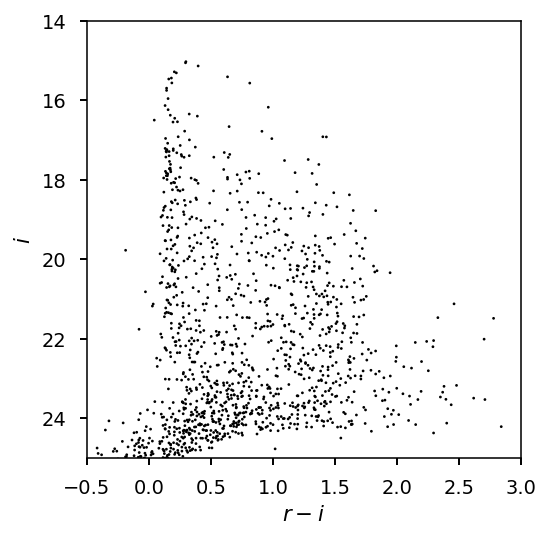

In [48]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-notebook')
plt.figure(1, figsize=(4, 4), dpi=140)
plt.scatter(rMags[selected] - iMags[selected],
            iMags[selected],
            edgecolors='None', s=2, c='k')
plt.xlim(-0.5, 3)
plt.ylim(25, 14)
plt.xlabel('$r-i$')
plt.ylabel('$i$')
plt.subplots_adjust(left=0.125, bottom=0.1)
plt.show()

## Ingestion and command line tasks.

Every command line task can also be executed as a python command. Lets check we can run throough the HSC examples in interactive Python. The following commands were used for the full HSC processing. These tasks will then be executed using the API. Each task has a python api version and a command line version. The tasks run pipeline commands and are developed at their own GitHub repo.

```
#example 1
ingestImages.py DATA $CI_HSC_DIR/raw/*.fits --mode=link
installTransmissionCurves.py DATA
# What about the linked repos?
#example4 coadding
# make the sky map
makeDiscreteSkyMap.py DATA --id --rerun processCcdOutputs:coadd --config skyMap.projection="TAN"
# make the coadd on the sky map from above
makeCoaddTempExp.py DATA --rerun coadd \
    --selectId filter=HSC-R \
    --id filter=HSC-R tract=0 patch=0,0^0,1^0,2^1,0^1,1^1,2^2,0^2,1^2,2 \
    --config doApplyExternalPhotoCalib=False doApplyExternalSkyWcs=False \
    doApplySkyCorr=False
# Repeat for I band
makeCoaddTempExp.py DATA --rerun coadd \
    --selectId filter=HSC-I \
    --id filter=HSC-I tract=0 patch=0,0^0,1^0,2^1,0^1,1^1,2^2,0^2,1^2,2 \
    --config doApplyExternalPhotoCalib=False doApplyExternalSkyWcs=False \
    doApplySkyCorr=False
    
assembleCoadd.py DATA --rerun coadd \
    --selectId filter=HSC-R \
    --id filter=HSC-R tract=0 patch=0,0^0,1^0,2^1,0^1,1^1,2^2,0^2,1^2,2
assembleCoadd.py DATA --rerun coadd \
    --selectId filter=HSC-I \
    --id filter=HSC-I tract=0 patch=0,0^0,1^0,2^1,0^1,1^1,2^2,0^2,1^2,2
```

In the example there are also some symlinked folders which perhaps should be ingested using a command line task 